In [5]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from pandas.api.types import CategoricalDtype 

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import os

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [6]:
# import train.csv
df = pd.read_csv('train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [7]:
df.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

### 1. EDA

In [8]:
#check shape
print(df.shape)

(1460, 81)


In [9]:
#check info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Noticed that the Dataset includes numerical and categorical variables

In [10]:
#check any null columns
df.columns[df.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

No null column names

In [11]:
#checking for null rows
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [12]:
# columns having at least one missing value
df.isnull().any()

# above is equivalent to axis=0 (by default, any() operates on columns)
df.isnull().any(axis=0)

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
                 ...  
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu       True
GarageType        True
GarageYrBlt       True
GarageFinish      True
GarageCars       False
GarageArea       False
GarageQual 

In [13]:
# rows having all missing values
df.isnull().all(axis=1)

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1430    False
1431    False
1432    False
1433    False
1434    False
1435    False
1436    False
1437    False
1438    False
1439    False
1440    False
1441    False
1442    False
1443    False
1444    False
1445    False
1446    False
1447    False
1448    False
1449    False
1450    False
1451    False
1452    False
1453    False
1454    False
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool

In [14]:
# sum it up to check how many rows have all missing values
df.isnull().all(axis=1).sum()

0

In [15]:
# sum of misisng values in each row
df.isnull().sum(axis=1)

0        5
1        4
2        4
3        4
4        4
5        3
6        4
7        4
8        4
9        4
10       5
11       4
12       6
13       4
14       4
15       4
16       4
17       9
18       5
19       4
20       4
21       2
22       4
23       4
24       4
25       4
26       5
27       4
28       4
29       5
        ..
1430     4
1431     6
1432     4
1433     4
1434     4
1435     3
1436     4
1437     4
1438     4
1439     4
1440     4
1441     5
1442     4
1443     5
1444     5
1445     5
1446     6
1447     4
1448     4
1449    10
1450    10
1451     4
1452     5
1453    10
1454     4
1455     4
1456     3
1457     2
1458     5
1459     5
Length: 1460, dtype: int64

We have now identified:
- The number of missing values in columns
- The number of missing values in rows

Let's now move ahead and treat the missing values.

### 1.1 Treating missing values

In [16]:
# summing up the missing values (column-wise)
round(100*(df.isnull().sum()/len(df.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
                 ...  
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars        0.00
GarageArea        0.00
GarageQual 

In [17]:
# removing the Four columns
df = df.drop('PoolQC', axis=1)
df = df.drop('Alley', axis=1)
df = df.drop('MiscFeature', axis=1)
df = df.drop('Fence', axis=1)

round(100*(df.isnull().sum()/len(df.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
                 ...  
BsmtHalfBath      0.00
FullBath          0.00
HalfBath          0.00
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinis

Deleted those four columns because their impact on this dataset even if the values are replaced wont be significant if not can be an outlier. hence deleted them. took a call on this

In [18]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
                 ...  
BsmtHalfBath      0.00
FullBath          0.00
HalfBath          0.00
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinis

In [19]:
### Treating missing values in rows
df[df.isnull().sum(axis=1) > 5]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
17      18          90       RL         72.0    10791   Pave      Reg   
39      40          90       RL         65.0     6040   Pave      Reg   
48      49         190       RM         33.0     4456   Pave      Reg   
78      79          90       RL         72.0    10778   Pave      Reg   
88      89          50  C (all)        105.0     8470   Pave      IR1   
89      90          20       RL         60.0     8070   Pave      Reg   
90      91          20       RL         60.0     7200   Pave      Reg   
99     100          20       RL         77.0     9320   Pave      IR1   
102    103          90       RL         64.0     7018   Pave      Reg   
108    109          50       RM         85.0     8500   Pave      Reg   
125    126         190       RM         60.0     6780   Pave      Reg   
148    149          20       RL         63.0     7500   Pave      Reg   
155    156          50       RL         60.0     9600   Pave      Reg   
156    157          20       RL         60.0     7200   Pave      Reg   
163    164          45       RL         55.0     5500   Pave      Reg   
165    166         190       RL         62.0    10106   Pave      Reg   
198    199          75       RM         92.0     5520   Pave      Reg   
210    211          30       RL         67.0     5604   Pave      Reg   
241    242          30       RM         40.0     3880   Pave      Reg   
250    251          30       RL         55.0     5350   Pave      IR1   
259    260          20       RM         70.0    12702   Pave      Reg   
287    288          20       RL          NaN     8125   Pave      IR1   
291    292         190       RL         55.0     5687   Pave      Reg   
307    308          50       RM          NaN     7920   Pave      IR1   
342    343          90       RL          NaN     8544   Pave      Reg   
375    376          30       RL          NaN    10020   Pave      IR1   
386    387          50       RL         58.0     8410   Pave      Reg   
392    393          20       RL          NaN     8339   Pave      IR1   
393    394          30       RL          NaN     7446   Pave      Reg   
431    432          50       RM         60.0     5586   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1011  1012          90       RL         75.0     9825   Pave      Reg   
1030  1031         190       RH          NaN     7082   Pave      Reg   
1035  1036          20       RL          NaN    11500   Pave      IR1   
1045  1046          20       RL          NaN    13680   Pave      IR1   
1049  1050          20       RL         60.0    11100   Pave      Reg   
1090  1091          90       RL         60.0     8544   Pave      Reg   
1096  1097          70       RM         60.0     6882   Pave      Reg   
1123  1124          20       RL         50.0     9405   Pave      Reg   
1131  1132          20       RL         63.0    10712   Pave      Reg   
1137  1138          50       RL         54.0     6342   Pave      Reg   
1143  1144          20       RL          NaN     9000   Pave      Reg   
1179  1180          20       RL         77.0     8335   Pave      Reg   
1216  1217          90       RM         68.0     8930   Pave      Reg   
1218  1219          50       RM         52.0     6240   Pave      Reg   
1219  1220         160       RM         21.0     1680   Pave      Reg   
1232  1233          90       RL         70.0     9842   Pave      Reg   
1234  1235          70       RH         55.0     8525   Pave      Reg   
1257  1258          30       RL         56.0     4060   Pave      Reg   
1283  1284          90       RL         94.0     9400   Pave      Reg   
1321  1322          20       RL          NaN     6627   Pave      IR1   
1323  1324          30       RL         50.0     5330   Pave      Reg   
1325  1326          30       RM         40.0     3636   Pave      Reg   
1326  1327          30       RH         70.0     4270   Pave      

In [20]:
# count the number of rows having > 5 missing values
# use len(df.index)
len(df[df.isnull().sum(axis=1) > 5].index)

98

In [21]:
# 98 rows have more than 5 missing values
# calculate the percentage
100*(len(df[df.isnull().sum(axis=1) > 5].index) / len(df.index))

6.712328767123288

Thus, about 7% rows have more than 5 missing values. Let's remove these rows and count the number of missing values remaining.

In [22]:
# retaining the rows having <= 5 NaNs
df = df[df.isnull().sum(axis=1) <= 5]

# look at the summary again
round(100*(df.isnull().sum()/len(df.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      18.06
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.59
MasVnrArea        0.59
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          0.44
                 ...  
BsmtHalfBath      0.00
FullBath          0.00
HalfBath          0.00
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      43.76
GarageType        0.51
GarageYrBlt       0.51
GarageFinis

Now, we have FireplaceQu and LotFrontage as the only variable having a significant number of missing values (more than 1 % atleast in this case). Let's give this variable a chance and consider imputing the NaNs.

In [23]:
df['FireplaceQu'].describe()

count     766
unique      5
top        Gd
freq      378
Name: FireplaceQu, dtype: object

In [24]:
df['LotFrontage'].describe()

count    1116.000000
mean       70.730287
std        24.519450
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

Notice the minimum is 21 and max is 313. There is some variance, the mean is about 70, for a count of 1116. 

In [25]:
# removing NaNs in LotFrontage
df = df[~np.isnan(df['LotFrontage'])]

round(100*(df.isnull().sum()/len(df.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage       0.00
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.54
MasVnrArea        0.54
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          0.54
                 ...  
BsmtHalfBath      0.00
FullBath          0.00
HalfBath          0.00
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      46.24
GarageType        0.63
GarageYrBlt       0.63
GarageFinis

In [26]:
#checking data type of FireplaceQu to decide next steps to handle missing data
print(df['FireplaceQu'].dtype)

object


In [27]:
#okay lets see what this column holds
print(df['FireplaceQu'])

0       NaN
1        TA
2        TA
3        Gd
4        TA
5       NaN
6        Gd
8        TA
9        TA
10      NaN
11       Gd
13       Gd
15      NaN
18      NaN
19      NaN
20       Gd
21       Gd
22       Gd
23       TA
25       Gd
26      NaN
27       Gd
28       Gd
29      NaN
30      NaN
32      NaN
33       Gd
34       Gd
35       Gd
36      NaN
       ... 
1420     TA
1421     Fa
1422    NaN
1425    NaN
1426     TA
1427     TA
1428     Gd
1430     Gd
1432    NaN
1433     TA
1434     Gd
1435     Gd
1436    NaN
1437     Gd
1438    NaN
1439     TA
1440     Gd
1442     Ex
1444    NaN
1445    NaN
1447     TA
1448    NaN
1451     Gd
1452    NaN
1454    NaN
1455     TA
1456     TA
1457     Gd
1458    NaN
1459    NaN
Name: FireplaceQu, Length: 1116, dtype: object


Its clear that when there is no data available, there is a NaN. Lets put the No back

In [28]:
df["FireplaceQu"].fillna('No', inplace=True)

In [29]:
#now lets check
print(df['FireplaceQu'])

0       No
1       TA
2       TA
3       Gd
4       TA
5       No
6       Gd
8       TA
9       TA
10      No
11      Gd
13      Gd
15      No
18      No
19      No
20      Gd
21      Gd
22      Gd
23      TA
25      Gd
26      No
27      Gd
28      Gd
29      No
30      No
32      No
33      Gd
34      Gd
35      Gd
36      No
        ..
1420    TA
1421    Fa
1422    No
1425    No
1426    TA
1427    TA
1428    Gd
1430    Gd
1432    No
1433    TA
1434    Gd
1435    Gd
1436    No
1437    Gd
1438    No
1439    TA
1440    Gd
1442    Ex
1444    No
1445    No
1447    TA
1448    No
1451    Gd
1452    No
1454    No
1455    TA
1456    TA
1457    Gd
1458    No
1459    No
Name: FireplaceQu, Length: 1116, dtype: object


In [30]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Id               0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.54
MasVnrArea       0.54
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         0.54
                 ... 
BsmtHalfBath     0.00
FullBath         0.00
HalfBath         0.00
BedroomAbvGr     0.00
KitchenAbvGr     0.00
KitchenQual      0.00
TotRmsAbvGrd     0.00
Functional       0.00
Fireplaces       0.00
FireplaceQu      0.00
GarageType       0.63
GarageYrBlt      0.63
GarageFinish     0.63
GarageCars       0.00
GarageArea

Hurray! very little missing data left (negligible) but most of them are now clear

In [31]:
#now what are we left with
df.shape

(1116, 77)

In [32]:
# fraction of rows lost
len(df.index)/1116

1.0

Thus, we have lost about 1% observations in cleaning the missing values. 

In [33]:
#separate variables into new data frames
numeric_data = df.select_dtypes(include=[np.number])
cat_data = df.select_dtypes(exclude=[np.number])

In [34]:
cat_data.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [35]:
numeric_data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [36]:
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))



There are 38 numeric and 39 categorical columns in train data


In [37]:
del numeric_data['Id']

(array([ 90., 557., 282., 110.,  50.,  16.,   4.,   3.,   2.,   2.]),
 array([ 35311. , 107279.9, 179248.8, 251217.7, 323186.6, 395155.5,
        467124.4, 539093.3, 611062.2, 683031.1, 755000. ]),
 <a list of 1 Patch objects>)

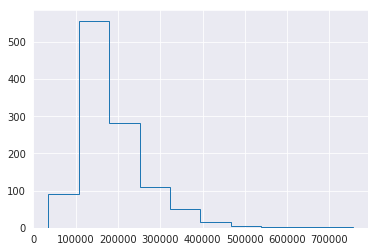

In [38]:
sns.set_style('darkgrid')
plt.hist(df['SalePrice'],histtype='step')

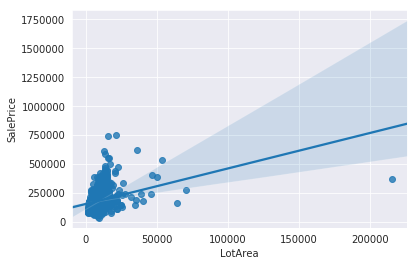

In [39]:
# visualize the data, when we visualize, we will have more clarity about the data
sns.regplot(x='LotArea', y='SalePrice', data=df)

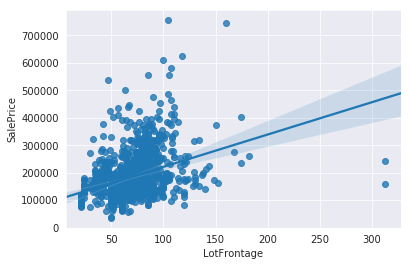

In [40]:
# visualize the data, when we visualize, we will have more clarity about the data
sns.regplot(x='LotFrontage', y='SalePrice', data=df)

<function matplotlib.pyplot.show(*args, **kw)>

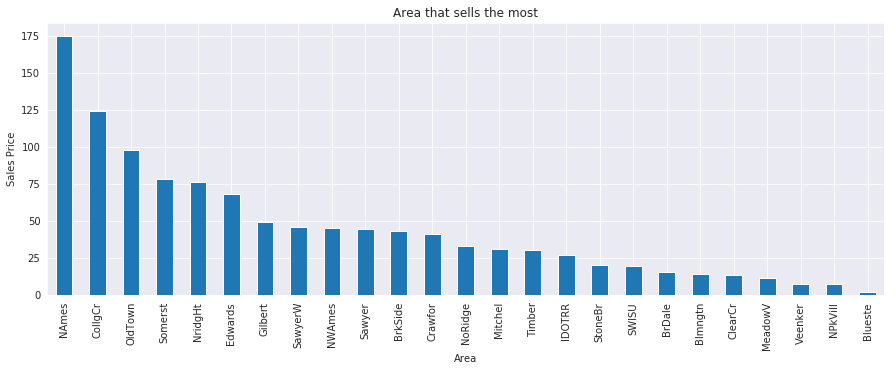

In [41]:
# Now lets check which Neighborhood sells the most
df['Neighborhood'].value_counts().plot(kind='bar', figsize=(15,5))
plt.title("Area that sells the most")
plt.ylabel('Sales Price')
plt.xlabel('Area')
plt.show

Looks like Names, ColligCr, OldTown, Somerset, NridgHt are high price Neighborhoods.

But these are not Average sales, we need to determine average sales in neighborhood to assess the demand. we will do this below

Before we get there Lets check Correlations and also plot numeric variables first to get a better understanding

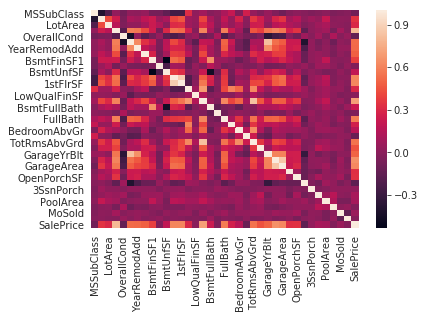

In [42]:
#correlation plot
corr = numeric_data.corr()
sns.heatmap(corr)

In [43]:
print (corr['SalePrice'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['SalePrice'].sort_values(ascending=False)[-5:]) #last 5 values`

SalePrice       1.000000
OverallQual     0.797021
GrLivArea       0.703793
GarageCars      0.650597
GarageArea      0.621284
TotalBsmtSF     0.615299
1stFlrSF        0.615142
FullBath        0.575154
TotRmsAbvGrd    0.550531
YearBuilt       0.524760
YearRemodAdd    0.516393
GarageYrBlt     0.502143
MasVnrArea      0.485876
Fireplaces      0.446901
BsmtFinSF1      0.386002
Name: SalePrice, dtype: float64 

----------------------
BsmtHalfBath    -0.039907
MSSubClass      -0.089675
KitchenAbvGr    -0.114497
OverallCond     -0.136223
EnclosedPorch   -0.158706
Name: SalePrice, dtype: float64


Now:

Notice that OverallQual feature is 79% correlated with the target variable. Also  GrLivArea is 70% correlated with the target variable. This sort of is relatable and makes sense. All these factors are important for people to make a decision to buy or not. and hence they impact the price in manyways (demand per se). variables show people also care about if the house has a garage, the area of that garage, the size of the basement area, etc. Let's check the OverallQual variable in detail.

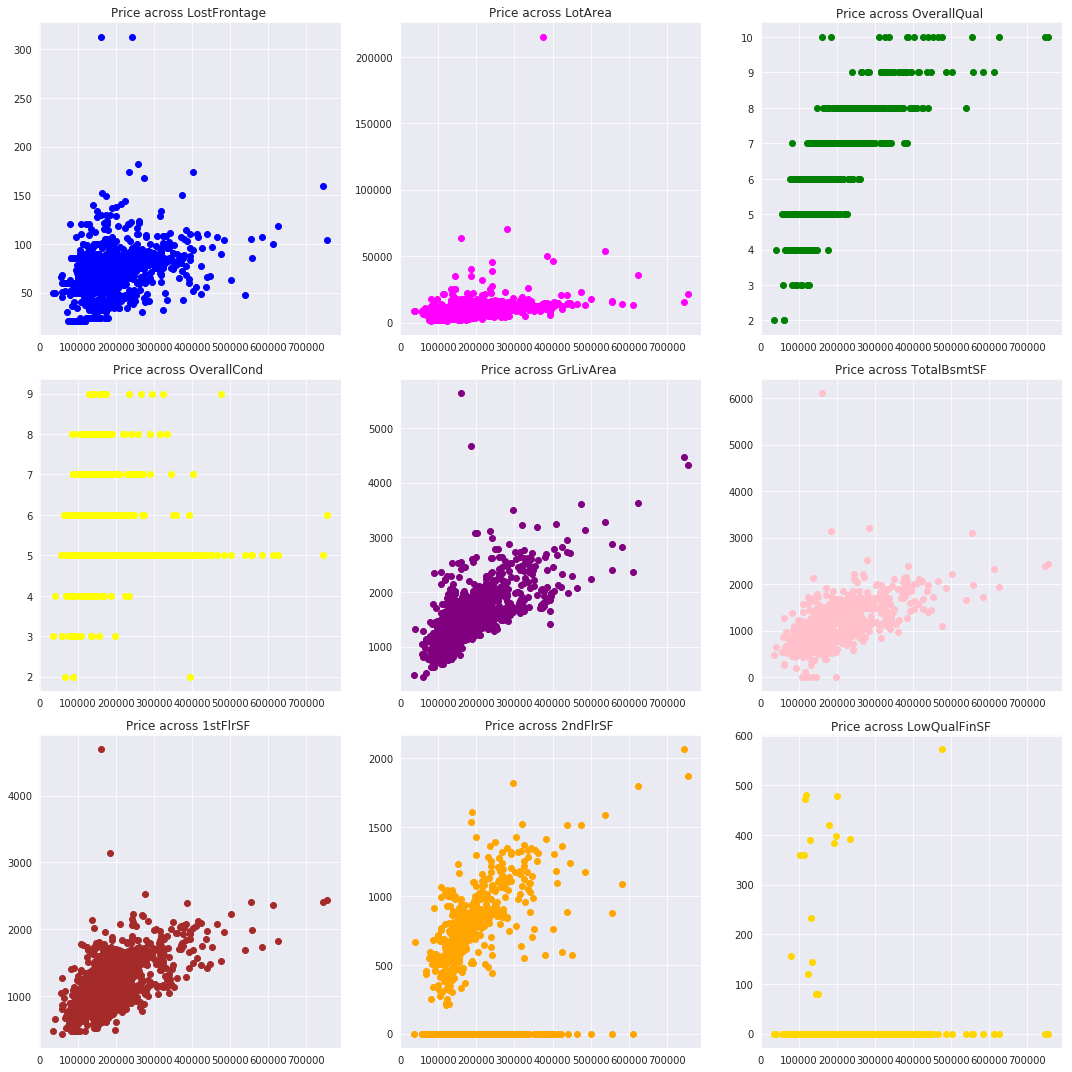

In [44]:
#Visualization of AVERAGE PRICE across each continuous attributes:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
plt.scatter(df['SalePrice'],df['LotFrontage'],color='blue')
plt.title("Price across LostFrontage ")
plt.subplot(3,3,2)
plt.scatter(df['SalePrice'],df['LotArea'],color='magenta')
plt.title("Price across LotArea")
plt.subplot(3,3,3)
plt.scatter(df['SalePrice'],df['OverallQual'],color='green')
plt.title("Price across OverallQual ")
plt.subplot(3,3,4)
plt.scatter(df['SalePrice'],df['OverallCond'],color='yellow')
plt.title("Price across OverallCond ")
plt.subplot(3,3,5)
plt.scatter(df['SalePrice'],df['GrLivArea'],color='purple')
plt.title("Price across GrLivArea ")
plt.subplot(3,3,6)
plt.scatter(df['SalePrice'],df['TotalBsmtSF'],color='pink')
plt.title("Price across TotalBsmtSF")
plt.subplot(3,3,7)
plt.scatter(df['SalePrice'],df['1stFlrSF'],color='brown')
plt.title("Price across 1stFlrSF ")
plt.subplot(3,3,8)
plt.scatter(df['SalePrice'],df['2ndFlrSF'],color='orange')
plt.title("Price across 2ndFlrSF ")
plt.subplot(3,3,9)
plt.scatter(df['SalePrice'],df['LowQualFinSF'],color='gold')
plt.title("Price across LowQualFinSF")
plt.tight_layout()
plt.show()

This tells us about the distribution, how lowQualFinSF has low pricing, how First floor pricing is clustered under 400,000 prcing, same thing with GrLivArea, and so on

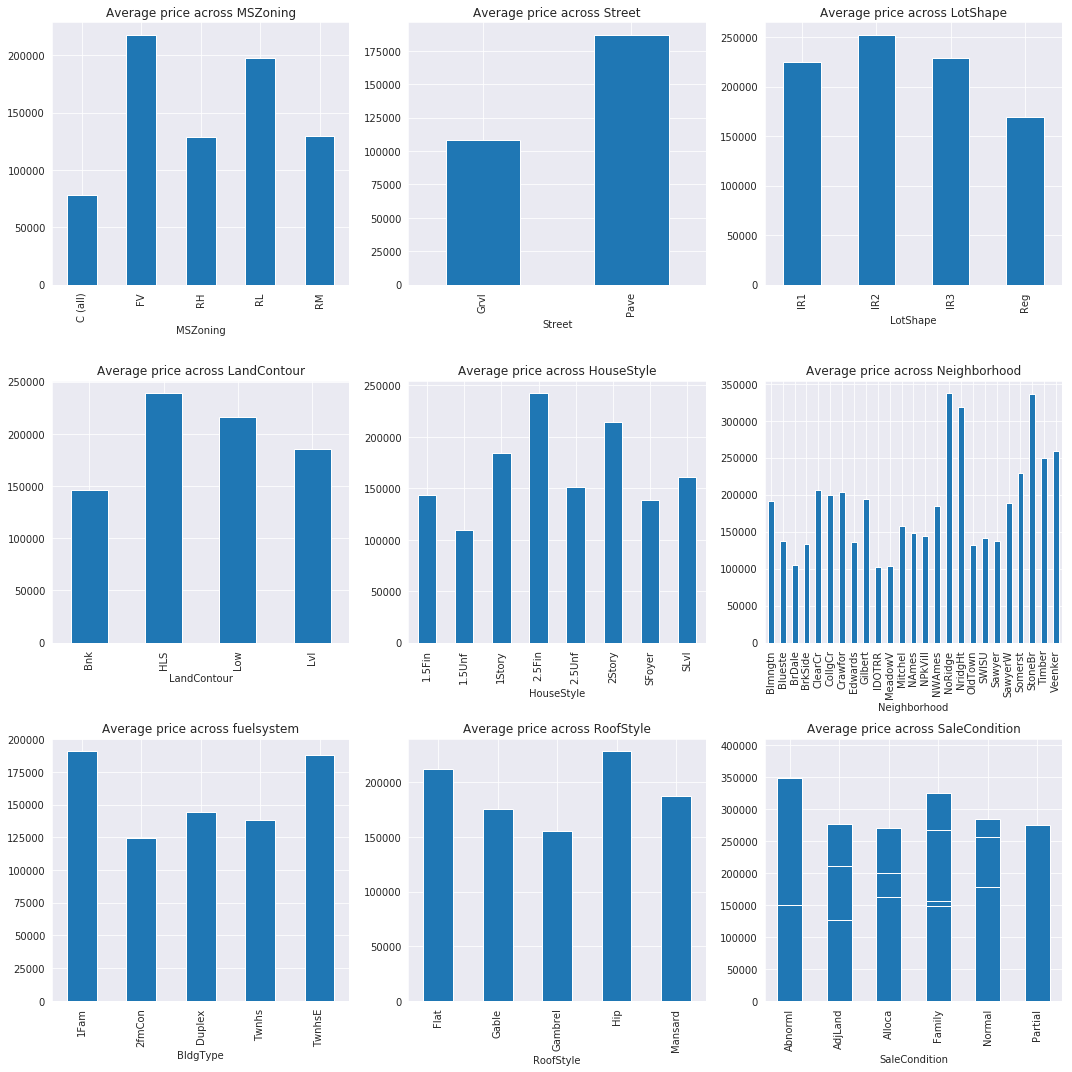

In [45]:
#Visualization of AVERAGE PRICE across each categorical variable:
from matplotlib import style
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
df.groupby('MSZoning')['SalePrice'].mean().plot(kind='bar')
plt.title("Average price across MSZoning")
plt.subplot(3,3,2)
df.groupby('Street')['SalePrice'].mean().plot(kind='bar')
plt.title("Average price across Street")
plt.subplot(3,3,3)
df.groupby('LotShape')['SalePrice'].mean().plot(kind='bar')
plt.title("Average price across LotShape")
plt.subplot(3,3,4)
df.groupby('LandContour')['SalePrice'].mean().plot(kind='bar')
plt.title("Average price across LandContour")
plt.subplot(3,3,5)
df.groupby('HouseStyle')['SalePrice'].mean().plot(kind='bar')
plt.title("Average price across HouseStyle")
plt.subplot(3,3,6)
df.groupby('Neighborhood')['SalePrice'].mean().plot(kind='bar')
plt.title("Average price across Neighborhood")
plt.subplot(3,3,7)
df.groupby('BldgType')['SalePrice'].mean().plot(kind='bar')
plt.title("Average price across fuelsystem")
plt.subplot(3,3,8)
df.groupby('RoofStyle')['SalePrice'].mean().plot(kind='bar')
plt.title("Average price across RoofStyle")
plt.subplot(3,3,9)
df.groupby('BsmtExposure')['SalePrice'].mean().plot(kind='bar')
plt.title("Average price across BsmtExposure")
plt.subplot(3,3,9)
df.groupby('RoofMatl')['SalePrice'].mean().plot(kind='bar')
plt.title("Average price across RoofMatl")
plt.subplot(3,3,9)
df.groupby('RoofStyle')['SalePrice'].mean().plot(kind='bar')
plt.title("Average price across RoofStyle")
plt.subplot(3,3,9)
df.groupby('Condition1')['SalePrice'].mean().plot(kind='bar')
plt.title("Average price across Condition1")
plt.subplot(3,3,9)
df.groupby('Condition2')['SalePrice'].mean().plot(kind='bar')
plt.title("Average price across Condition2")
plt.subplot(3,3,9)
df.groupby('Foundation')['SalePrice'].mean().plot(kind='bar')
plt.title("Average price across Foundation")
plt.subplot(3,3,9)
df.groupby('KitchenQual')['SalePrice'].mean().plot(kind='bar')
plt.title("Average price across KitchenQual")
plt.subplot(3,3,9)
df.groupby('GarageType')['SalePrice'].mean().plot(kind='bar')
plt.title("Average price across GarageType")
plt.subplot(3,3,9)
df.groupby('GarageType')['SalePrice'].mean().plot(kind='bar')
plt.title("Average price across GarageFinish")
plt.subplot(3,3,9)
df.groupby('CentralAir')['SalePrice'].mean().plot(kind='bar')
plt.title("Average price across CentralAir")
plt.subplot(3,3,9)
df.groupby('GarageType')['SalePrice'].mean().plot(kind='bar')
plt.title("Average price across GarageType")
plt.subplot(3,3,9)
df.groupby('HeatingQC')['SalePrice'].mean().plot(kind='bar')
plt.title("Average price across HeatingQC")
plt.subplot(3,3,9)
df.groupby('FireplaceQu')['SalePrice'].mean().plot(kind='bar')
plt.title("Average price across FireplaceQu")
plt.subplot(3,3,9)
df.groupby('SaleType')['SalePrice'].mean().plot(kind='bar')
plt.title("Average price across SaleType")
plt.subplot(3,3,9)
df.groupby('Exterior1st')['SalePrice'].mean().plot(kind='bar')
plt.title("Average price across Exterior1st")
plt.subplot(3,3,9)
df.groupby('SaleCondition')['SalePrice'].mean().plot(kind='bar')
plt.title("Average price across SaleCondition")
plt.subplot(3,3,9)
plt.tight_layout()
style.use('classic')
plt.show()

Many insights we can draw here, Landcontour HLS and Low have high price, House style 2.5Fin and 2.5Unf have high sales price, Hop and Mansard roof styles along with Flat have high price, Gable and Gambrel not so much, Normal, Family, PArtial and Abnorml have high price AdjLand and Alloca doesnt, also interestingly, NRidge and NridghHt along with stoneBr have high average sales and so on! This gives us excellent understanding of the data

In [46]:
cat_data.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... KitchenQual Functional FireplaceQu  \
0      CollgCr       Norm       Norm  ...          Gd        Typ          No   
1      Veenker      Feedr       Norm  ...          TA        Typ          TA   
2      CollgCr       Norm       Norm  ...          Gd        Typ          TA   
3      Crawfor       Norm       Norm  ...          Gd        Typ          Gd   
4      NoRidge       Norm       Norm  ...          Gd        Typ          TA   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd          RFn         TA         TA          Y       WD   
1     Attchd          RFn         TA         TA          Y       WD   
2     Attchd          RFn         TA         TA          Y       WD   
3     Detchd          Unf         TA         TA          Y       WD   
4     Attchd          RFn         TA         TA          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 39 columns]

In [47]:
# convert into dummies
train_dummies = pd.get_dummies(cat_data, drop_first=True)
train_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
0  ...               0               0             0             0   
1  ...               0               0             0             0   
2  ...               0               0             0             0   
3  ...               0               0             0             0   
4  ...               0               0             0             0   

   SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0            1                      0                     0   
1            1                      0                     0   
2            1                      0                     0   
3            1                      0                     0   
4            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 191 columns]

In [48]:
master_df = pd.concat([train_dummies, numeric_data], axis=1)

In [49]:
master_df.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   ...  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0  ...           0           61              0          0            0   
1  ...         298            0              0          0            0   
2  ...           0           42              0          0            0   
3  ...           0           35            272          0            0   
4  ...         192           84              0          0            0   

   PoolArea  MiscVal  MoSold  YrSold  SalePrice  
0         0        0       2    2008     208500  
1         0        0       5    2007     181500  
2         0        0       9    2008     223500  
3         0        0       2    2006     140000  
4         0        0      12    2008     250000  

[5 rows x 228 columns]

In [53]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = master_df.columns
X = pd.DataFrame(scale(master_df))
X.columns = cols
X.columns

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LandContour_HLS', 'LandContour_Low',
       ...
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object', length=228)

In [54]:
#let's check the mean price per quality and plot it.
pivot = df.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)

In [55]:
pivot.sort_values

<bound method DataFrame.sort_values of              SalePrice
OverallQual           
2                60000
3               100000
4               109900
5               132500
6               157900
7               200000
8               270000
9               347500
10              426000>

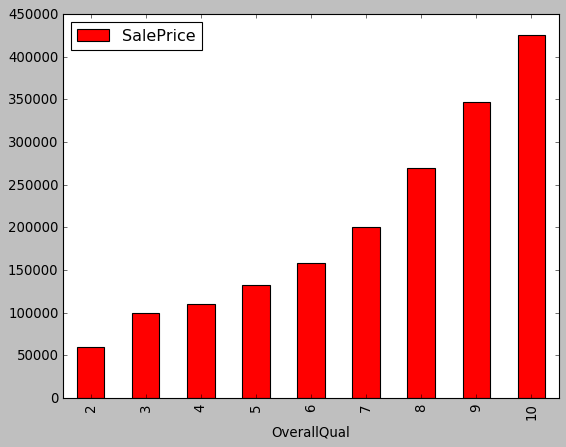

In [56]:
pivot.plot(kind='bar', color='red')

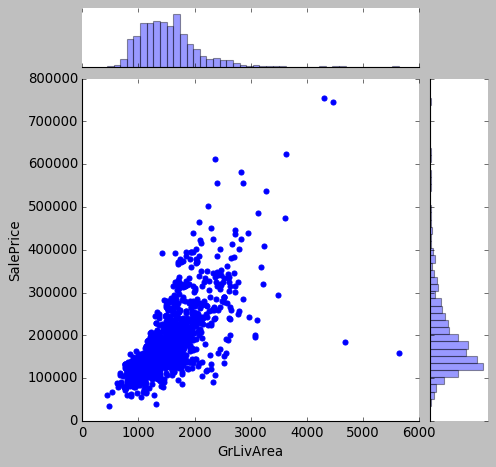

In [57]:
#GrLivArea variable
sns.jointplot(x=df['GrLivArea'], y=df['SalePrice'])

Most of them are within 3000 GrLivArea and the pricing too has high cluster of sale price under 400,000. There are some outliers who are affecting our mean

In [58]:
#check categorical data
cat_data.describe()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
count      1116   1116     1116        1116      1116      1116      1116   
unique        5      2        4           4         1         5         3   
top          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
freq        864   1112      777        1011      1116       849      1067   

       Neighborhood Condition1 Condition2  ... KitchenQual Functional  \
count          1116       1116       1116  ...        1116       1116   
unique           25          9          6  ...           4          6   
top           NAmes       Norm       Norm  ...          TA        Typ   
freq            175        968       1104  ...         538       1041   

       FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive  \
count         1116       1109         1109       1109       1109       1116   
unique           6          6            3          5          5          3   
top             No     Attchd          Unf         TA         TA          Y   
freq           516        690          488       1046       1065       1042   

       SaleType SaleCondition  
count      1116          1116  
unique        9             6  
top          WD        Normal  
freq        944           899  

[4 rows x 39 columns]

In [59]:
#lets check the sale condition versus sale price
sp_pivot = df.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
sp_pivot

SalePrice
SaleCondition           
Abnorml           129950
AdjLand           126000
Alloca            131148
Family            140500
Normal            160000
Partial           247453

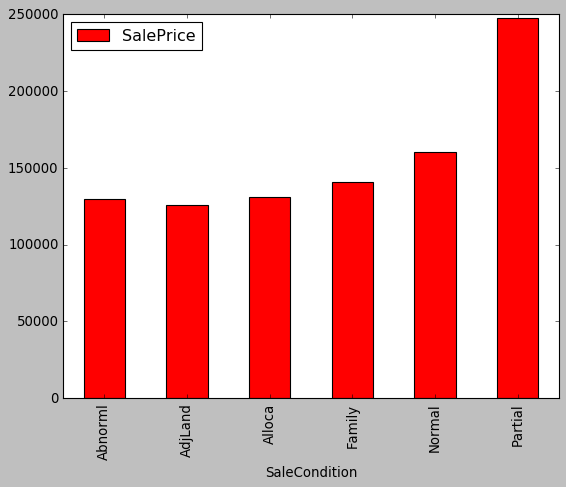

In [60]:
sp_pivot.plot(kind='bar',color='red')

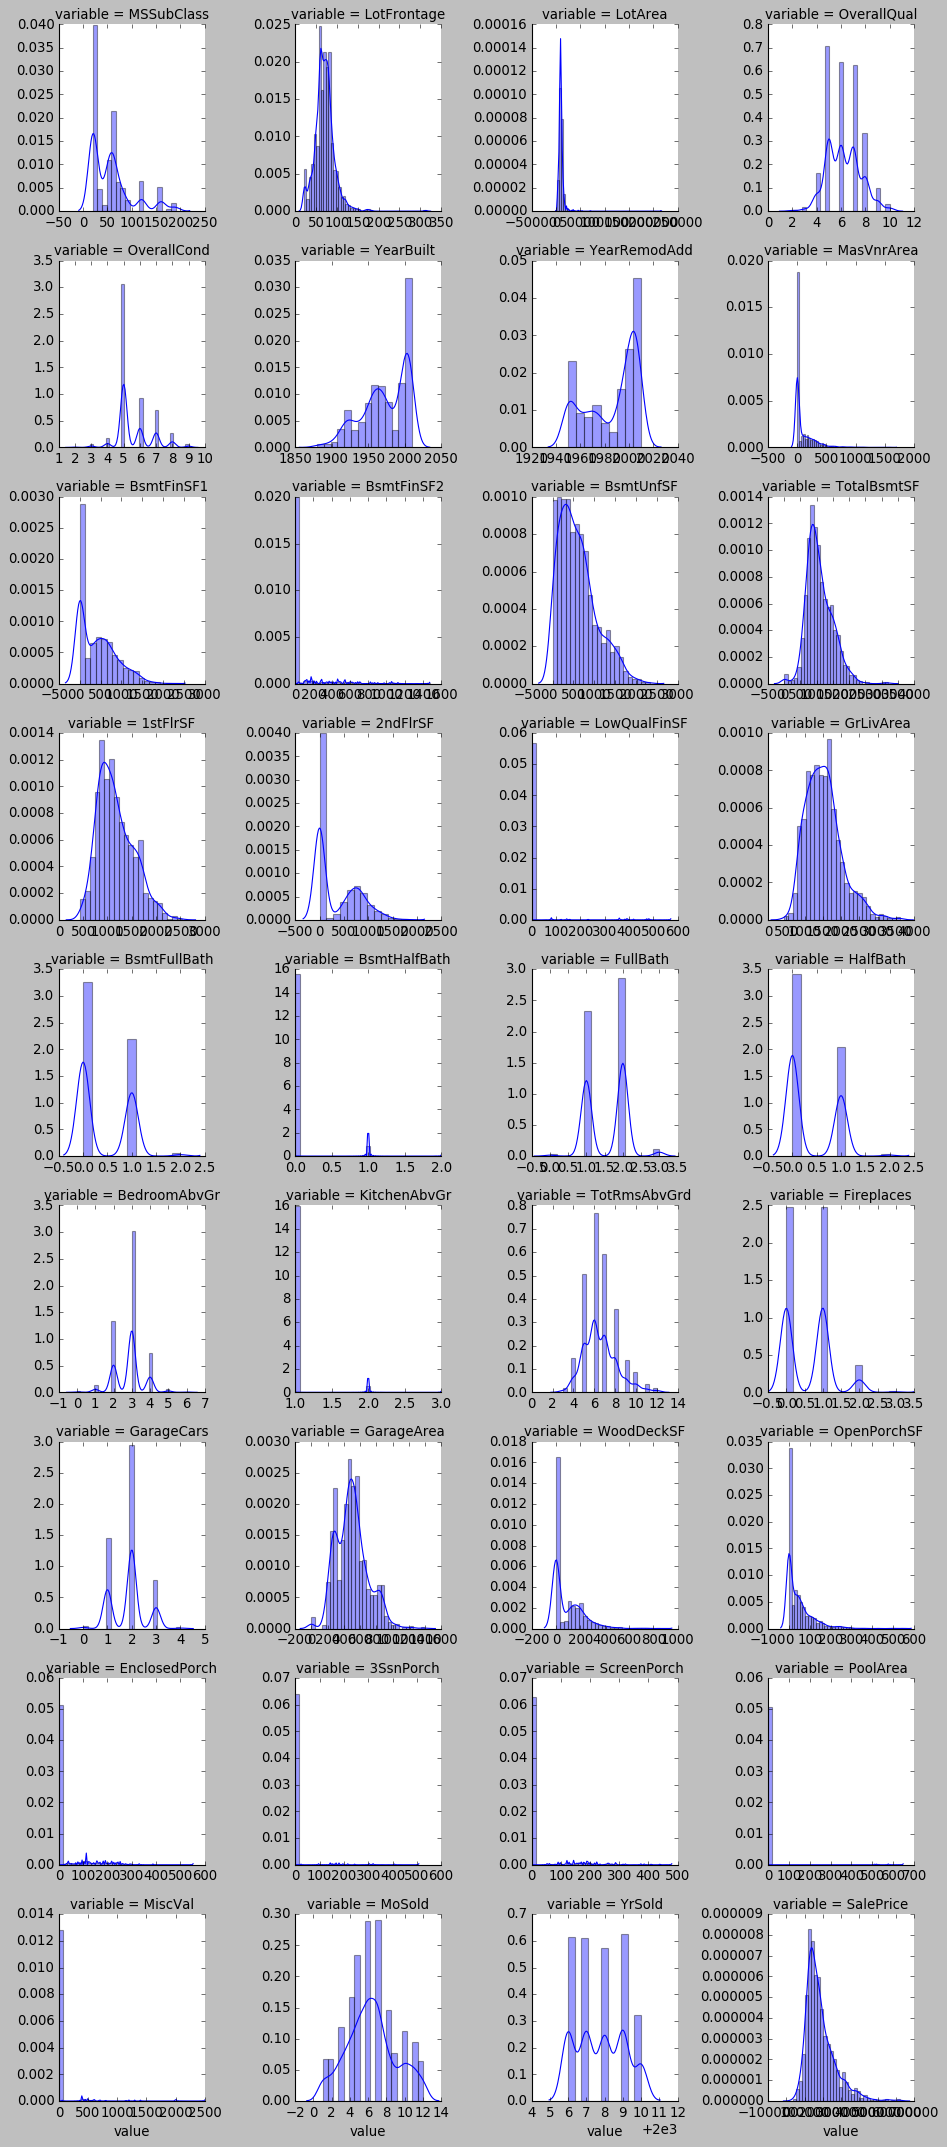

In [75]:
#create numeric plots
num = [f for f in df.columns if df.dtypes[f] != 'object']
num.remove('Id')
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

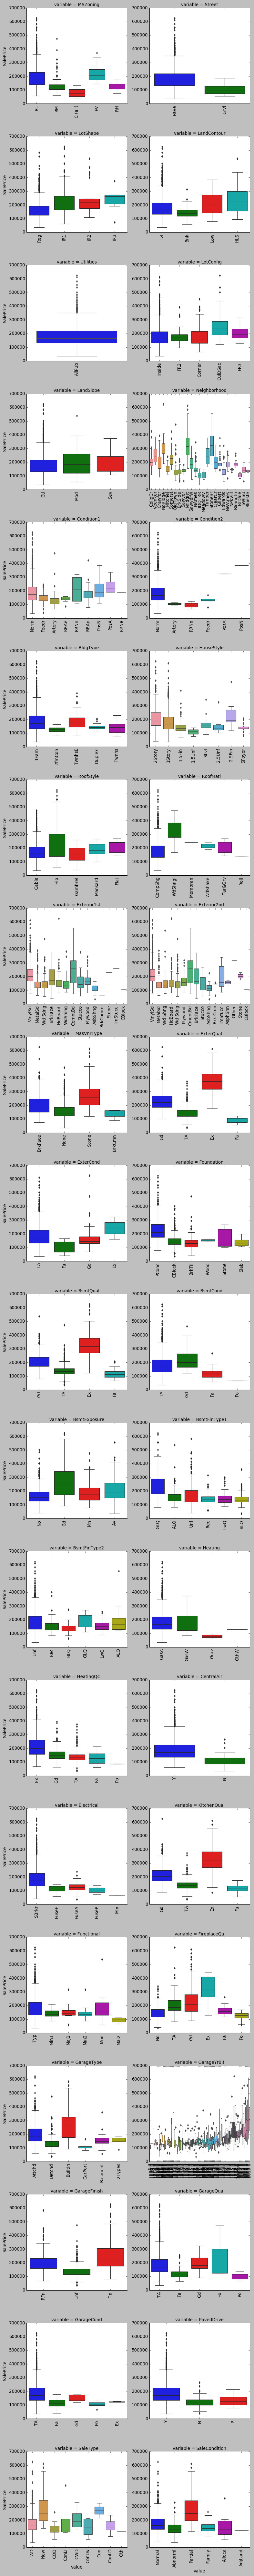

In [76]:
#creating box plot to visualize for outliers
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)

cat = [f for f in df.columns if df.dtypes[f] == 'object']

p = pd.melt(df, id_vars='SalePrice', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','SalePrice')
g

In [77]:
#removing outliers in GrLivArea
df.drop(df[df['GrLivArea'] > 4000].index, inplace=True)
df.shape #removed 4 rows`

(1114, 77)

In [78]:
#imputing using mode
df.loc[666, 'GarageQual'] = "TA" #stats.mode(test['GarageQual']).mode
df.loc[666, 'GarageCond'] = "TA" #stats.mode(test['GarageCond']).mode
df.loc[666, 'GarageFinish'] = "Unf" #stats.mode(test['GarageFinish']).mode
df.loc[666, 'GarageYrBlt'] = "1980" #np.nanmedian(test['GarageYrBlt'])` 

In [79]:
#mark as missing
df.loc[1116, 'GarageType'] = np.nan

In [80]:
#impute lotfrontage by median of neighborhood
lot_frontage_by_neighborhood = df['LotFrontage'].groupby(df['Neighborhood'])

for key, group in lot_frontage_by_neighborhood:
                idx = (df['Neighborhood'] == key) & (df['LotFrontage'].isnull())
                df.loc[idx, 'LotFrontage'] = group.median()

In [81]:
#imputing missing values
df["MasVnrArea"].fillna(0, inplace=True)
df["BsmtFinSF1"].fillna(0, inplace=True)
df["BsmtFinSF2"].fillna(0, inplace=True)
df["BsmtUnfSF"].fillna(0, inplace=True)
df["TotalBsmtSF"].fillna(0, inplace=True)
df["GarageArea"].fillna(0, inplace=True)
df["BsmtFullBath"].fillna(0, inplace=True)
df["BsmtHalfBath"].fillna(0, inplace=True)
df["GarageCars"].fillna(0, inplace=True)
df["GarageYrBlt"].fillna(0.0, inplace=True)
df["PoolArea"].fillna(0, inplace=True)

In [84]:
df = df.dropna(axis=0)

In [85]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
                ... 
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Functional       0.0
Fireplaces       0.0
FireplaceQu      0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond   

In [86]:
#checking for any null values
df.isnull().values.any()

False

In [87]:
# filter only area and price
df1 = df.loc[:, ['LotArea', 'SalePrice']]
df1.head()

LotArea  SalePrice
0   8450.0   208500.0
1   9600.0   181500.0
2  11250.0   223500.0
3   9550.0   140000.0
4  14260.0   250000.0

In [88]:
df1.isnull().values.any()

False

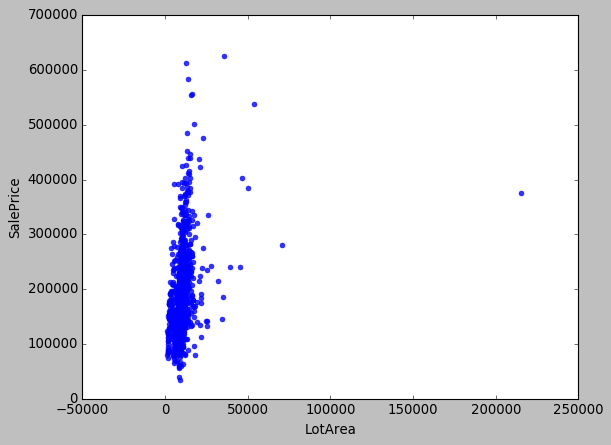

In [89]:
# visualise area-price relationship
sns.regplot(x="LotArea", y="SalePrice", data=df1, fit_reg=False)

In [90]:
# split into train and test
df_train, df_test = train_test_split(df1, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 10)
print(len(df_train))
print(len(df_test))

763
327


In [91]:
# split into X and y for both train and test sets
# reshaping is required since sklearn requires the data to be in shape
# (n, 1), not as a series of shape (n, )
X_train = df_train['LotArea']
X_train = X_train.values.reshape(-1, 1)
y_train = df_train['SalePrice']

X_test = df_test['LotArea']
X_test = X_test.values.reshape(-1, 1)
y_test = df_test['SalePrice']

In sklearn, polynomial features can be generated using the PolynomialFeatures class. Also, to perform LinearRegression and PolynomialFeatures in tandem, we will use the module sklearn_pipeline - it basically creates the features and feeds the output to the model (in that sequence).

In [92]:
len(X_train)

763

Let's now predict the y labels (for both train and test sets) and store the predictions in a table. Each row of the table is one data point, each column is a value of  nn  (degree).

In [93]:
# fit multiple polynomial features
degrees = [1, 2, 3, 6, 10, 20]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
y_train_pred = np.zeros((len(X_train), len(degrees)))
y_test_pred = np.zeros((len(X_test), len(degrees)))

for i, degree in enumerate(degrees):
    
    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = model.predict(X_train)
    y_test_pred[:, i] = model.predict(X_test)

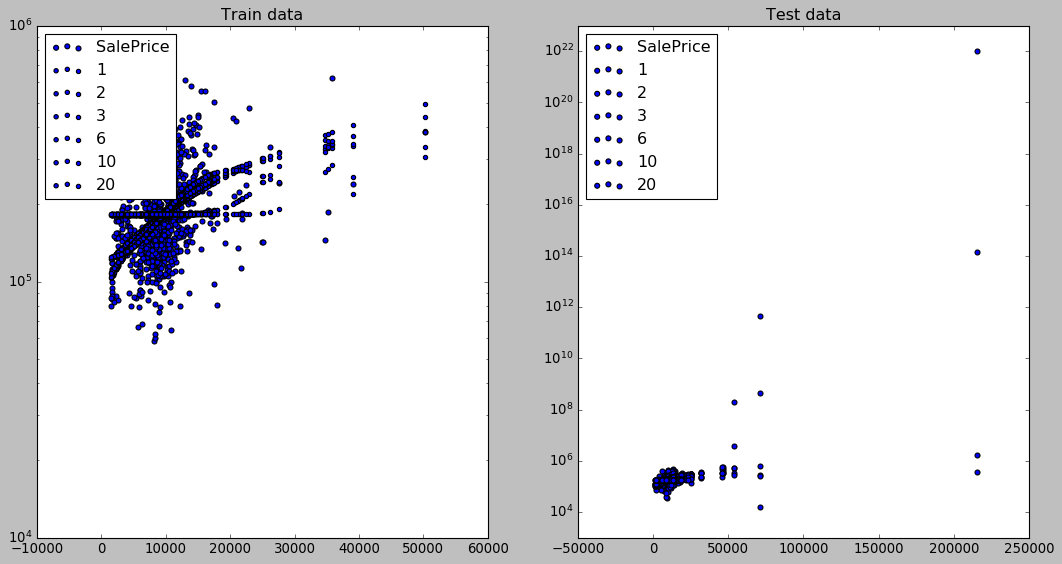

In [94]:
# visualise train and test predictions
# note that the y axis is on a log scale

plt.figure(figsize=(16, 8))

# train data
plt.subplot(121)
plt.scatter(X_train, y_train)
plt.yscale('log')
plt.title("Train data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_train, y_train_pred[:, i], s=15, label=str(degree))
    plt.legend(loc='upper left')
    
# test data
plt.subplot(122)
plt.scatter(X_test, y_test)
plt.yscale('log')
plt.title("Test data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_test, y_test_pred[:, i], label=str(degree))
    plt.legend(loc='upper left')

In [95]:
# compare r2 for train and test sets (for all polynomial fits)
print("R-squared values: \n")

for i, degree in enumerate(degrees):
    train_r2 = round(sklearn.metrics.r2_score(y_train, y_train_pred[:, i]), 2)
    test_r2 = round(sklearn.metrics.r2_score(y_test, y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))

R-squared values: 

Polynomial degree 1: train score=0.18, test score=-0.75
Polynomial degree 2: train score=0.19, test score=-7.29
Polynomial degree 3: train score=0.19, test score=-176.61
Polynomial degree 6: train score=0.22, test score=-10324223301.31
Polynomial degree 10: train score=0.03, test score=-1.0298891804047936e+16
Polynomial degree 20: train score=0.02, test score=-4.592274364289137e+31


## 2. Building a Model Without Cross-Validation

Let's now build a multiple regression model. First, let's build a vanilla MLR model without any cross-validation etc. 

In [96]:
master_df.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   ...  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0  ...           0           61              0          0            0   
1  ...         298            0              0          0            0   
2  ...           0           42              0          0            0   
3  ...           0           35            272          0            0   
4  ...         192           84              0          0            0   

   PoolArea  MiscVal  MoSold  YrSold  SalePrice  
0         0        0       2    2008     208500  
1         0        0       5    2007     181500  
2         0        0       9    2008     223500  
3         0        0       2    2006     140000  
4         0        0      12    2008     250000  

[5 rows x 228 columns]

In [97]:
master_df.isna().sum()

MSZoning_FV             0
MSZoning_RH             0
MSZoning_RL             0
MSZoning_RM             0
Street_Pave             0
LotShape_IR2            0
LotShape_IR3            0
LotShape_Reg            0
LandContour_HLS         0
LandContour_Low         0
LandContour_Lvl         0
LotConfig_CulDSac       0
LotConfig_FR2           0
LotConfig_FR3           0
LotConfig_Inside        0
LandSlope_Mod           0
LandSlope_Sev           0
Neighborhood_Blueste    0
Neighborhood_BrDale     0
Neighborhood_BrkSide    0
Neighborhood_ClearCr    0
Neighborhood_CollgCr    0
Neighborhood_Crawfor    0
Neighborhood_Edwards    0
Neighborhood_Gilbert    0
Neighborhood_IDOTRR     0
Neighborhood_MeadowV    0
Neighborhood_Mitchel    0
Neighborhood_NAmes      0
Neighborhood_NPkVill    0
                       ..
MasVnrArea              6
BsmtFinSF1              0
BsmtFinSF2              0
BsmtUnfSF               0
TotalBsmtSF             0
1stFlrSF                0
2ndFlrSF                0
LowQualFinSF

In [98]:
# drop rows with NaNs
master_df = master_df.dropna(axis=0)
master_df.isna().sum()

MSZoning_FV             0
MSZoning_RH             0
MSZoning_RL             0
MSZoning_RM             0
Street_Pave             0
LotShape_IR2            0
LotShape_IR3            0
LotShape_Reg            0
LandContour_HLS         0
LandContour_Low         0
LandContour_Lvl         0
LotConfig_CulDSac       0
LotConfig_FR2           0
LotConfig_FR3           0
LotConfig_Inside        0
LandSlope_Mod           0
LandSlope_Sev           0
Neighborhood_Blueste    0
Neighborhood_BrDale     0
Neighborhood_BrkSide    0
Neighborhood_ClearCr    0
Neighborhood_CollgCr    0
Neighborhood_Crawfor    0
Neighborhood_Edwards    0
Neighborhood_Gilbert    0
Neighborhood_IDOTRR     0
Neighborhood_MeadowV    0
Neighborhood_Mitchel    0
Neighborhood_NAmes      0
Neighborhood_NPkVill    0
                       ..
MasVnrArea              0
BsmtFinSF1              0
BsmtFinSF2              0
BsmtUnfSF               0
TotalBsmtSF             0
1stFlrSF                0
2ndFlrSF                0
LowQualFinSF

In [99]:
from sklearn.preprocessing import StandardScaler
y = master_df.loc[:, 'SalePrice']
X = master_df.loc[:, df.columns != 'SalePrice']

# scale
scaler = StandardScaler()
scaler.fit(X)

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 1)

In [100]:
X_train.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
923             0            0            1            0            1   
272             0            0            1            0            1   
1132            0            0            0            1            1   
483             0            0            0            1            1   
1104            0            0            0            1            1   

      LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
923              0             0             1                0   
272              0             0             0                0   
1132             0             0             1                0   
483              0             0             1                0   
1104             0             0             1                0   

      LandContour_Low  ...  RoofStyle_Gambrel  RoofStyle_Hip  \
923                 0  ...                  0              0   
272                 0  ...                  0              0   
1132                0  ...                  0              0   
483                 0  ...                  0              1   
1104                0  ...                  0              0   

      RoofStyle_Mansard  RoofMatl_CompShg  RoofMatl_Membran  RoofMatl_Roll  \
923                   0                 1                 0              0   
272                   0                 1                 0              0   
1132                  0                 1                 0              0   
483                   0                 1                 0              0   
1104                  0                 1                 0              0   

      RoofMatl_Tar&Grv  RoofMatl_WdShake  RoofMatl_WdShngl  \
923                  0                 0                 0   
272                  0                 0                 0   
1132                 0                 0                 0   
483                  0                 0                 0   
1104                 0                 0                 0   

      Exterior1st_BrkComm  
923                     0  
272                     0  
1132                    0  
483                     0  
1104                    0  

[5 rows x 76 columns]

In [101]:
# train-test 70-30 split
df_train, df_test = train_test_split(master_df, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 100)

# rescale the features
scaler = MinMaxScaler()

# apply scaler() to all the numeric columns 
numeric_vars = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice']
df_train[numeric_vars] = scaler.fit_transform(df_train[numeric_vars])
df_train.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
571             0            0            1            0            1   
353             0            0            0            1            1   
1353            0            0            1            0            1   
1091            1            0            0            0            1   
289             0            0            1            0            1   

      LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
571              0             0             1                0   
353              0             0             1                0   
1353             0             0             0                0   
1091             0             0             1                0   
289              0             0             1                0   

      LandContour_Low  ...  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
571                 0  ...    0.251497     0.000000            0.0        0.0   
353                 0  ...    0.158683     0.000000            0.0        0.0   
1353                0  ...    0.423653     0.171315            0.0        0.0   
1091                0  ...    0.000000     0.095618            0.0        0.0   
289                 0  ...    0.000000     0.000000            0.0        0.0   

      ScreenPorch  PoolArea  MiscVal    MoSold  YrSold  SalePrice  
571      0.000000       0.0      0.0  0.818182    0.00   0.092897  
353      0.000000       0.0      0.0  0.363636    1.00   0.072433  
1353     0.000000       0.0      0.0  0.181818    1.00   0.513793  
1091     0.000000       0.0      0.0  0.181818    0.50   0.150952  
289      0.588636       0.0      0.0  0.545455    0.25   0.141627  

[5 rows x 228 columns]

In [102]:
df_train.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
571             0            0            1            0            1   
353             0            0            0            1            1   
1353            0            0            1            0            1   
1091            1            0            0            0            1   
289             0            0            1            0            1   

      LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
571              0             0             1                0   
353              0             0             1                0   
1353             0             0             0                0   
1091             0             0             1                0   
289              0             0             1                0   

      LandContour_Low  ...  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
571                 0  ...    0.251497     0.000000            0.0        0.0   
353                 0  ...    0.158683     0.000000            0.0        0.0   
1353                0  ...    0.423653     0.171315            0.0        0.0   
1091                0  ...    0.000000     0.095618            0.0        0.0   
289                 0  ...    0.000000     0.000000            0.0        0.0   

      ScreenPorch  PoolArea  MiscVal    MoSold  YrSold  SalePrice  
571      0.000000       0.0      0.0  0.818182    0.00   0.092897  
353      0.000000       0.0      0.0  0.363636    1.00   0.072433  
1353     0.000000       0.0      0.0  0.181818    1.00   0.513793  
1091     0.000000       0.0      0.0  0.181818    0.50   0.150952  
289      0.588636       0.0      0.0  0.545455    0.25   0.141627  

[5 rows x 228 columns]

In [103]:
df_train.isna().sum()

MSZoning_FV             0
MSZoning_RH             0
MSZoning_RL             0
MSZoning_RM             0
Street_Pave             0
LotShape_IR2            0
LotShape_IR3            0
LotShape_Reg            0
LandContour_HLS         0
LandContour_Low         0
LandContour_Lvl         0
LotConfig_CulDSac       0
LotConfig_FR2           0
LotConfig_FR3           0
LotConfig_Inside        0
LandSlope_Mod           0
LandSlope_Sev           0
Neighborhood_Blueste    0
Neighborhood_BrDale     0
Neighborhood_BrkSide    0
Neighborhood_ClearCr    0
Neighborhood_CollgCr    0
Neighborhood_Crawfor    0
Neighborhood_Edwards    0
Neighborhood_Gilbert    0
Neighborhood_IDOTRR     0
Neighborhood_MeadowV    0
Neighborhood_Mitchel    0
Neighborhood_NAmes      0
Neighborhood_NPkVill    0
                       ..
MasVnrArea              0
BsmtFinSF1              0
BsmtFinSF2              0
BsmtUnfSF               0
TotalBsmtSF             0
1stFlrSF                0
2ndFlrSF                0
LowQualFinSF

In [104]:
# drop rows with NaNs
df = df.dropna(axis=0)
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
                ..
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch   

In [105]:
# num of max features
len(X_train.columns)

76

In [106]:
# first model with an arbitrary choice of n_features
# running RFE with number of features=10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=10)             
rfe = rfe.fit(X_train, y_train)

In [107]:
# tuples of (feature name, whether selected, ranking)
# note that the 'rank' is > 1 for non-selected features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSZoning_FV', False, 57),
 ('MSZoning_RH', False, 3),
 ('MSZoning_RL', False, 46),
 ('MSZoning_RM', False, 28),
 ('Street_Pave', False, 18),
 ('LotShape_IR2', False, 59),
 ('LotShape_IR3', False, 26),
 ('LotShape_Reg', False, 50),
 ('LandContour_HLS', False, 21),
 ('LandContour_Low', False, 29),
 ('LandContour_Lvl', False, 61),
 ('LotConfig_CulDSac', False, 14),
 ('LotConfig_FR2', False, 51),
 ('LotConfig_FR3', True, 1),
 ('LotConfig_Inside', False, 53),
 ('LandSlope_Mod', False, 44),
 ('LandSlope_Sev', False, 45),
 ('Neighborhood_Blueste', False, 35),
 ('Neighborhood_BrDale', False, 22),
 ('Neighborhood_BrkSide', False, 7),
 ('Neighborhood_ClearCr', False, 13),
 ('Neighborhood_CollgCr', False, 25),
 ('Neighborhood_Crawfor', False, 24),
 ('Neighborhood_Edwards', False, 10),
 ('Neighborhood_Gilbert', False, 23),
 ('Neighborhood_IDOTRR', True, 1),
 ('Neighborhood_MeadowV', False, 6),
 ('Neighborhood_Mitchel', False, 15),
 ('Neighborhood_NAmes', False, 11),
 ('Neighborhood_NPkVill', Fa

In [108]:
# predict prices of X_test
y_pred = rfe.predict(X_test)

# evaluate the model on test set
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.3752221219080054


In [109]:
# try with another value of RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=6)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.3629988806782948


In [110]:
# k-fold CV (using all the 13 variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
scores  

array([ 4.90481819e-01, -4.94707725e+23,  6.53989369e-01,  6.41374503e-01,
        6.20644672e-01])

In [111]:
# the other way of doing the same thing (more explicit)

# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
scores 

array([-6.23714768e+25,  6.50230213e-01, -8.27147500e+23, -4.13694999e+24,
        5.81984411e-01])

In [113]:
# number of features in X_train
len(X_train.columns)

76

In [114]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    5.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=None, step=1, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [115]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.088438      0.007590         0.001367        0.000526   
1        0.086630      0.011484         0.000843        0.000018   
2        0.076771      0.005803         0.000861        0.000072   
3        0.113319      0.049048         0.000895        0.000061   
4        0.078513      0.009376         0.000964        0.000185   
5        0.078472      0.009350         0.000870        0.000063   
6        0.078606      0.009040         0.000919        0.000133   
7        0.073979      0.003612         0.000831        0.000008   
8        0.080885      0.004584         0.000947        0.000130   
9        0.084776      0.011010         0.001061        0.000203   
10       0.074183      0.006636         0.000876        0.000043   
11       0.086952      0.026352         0.000968        0.000123   
12       0.074261      0.003592         0.000882        0.000047   

   param_n_features_to_select                        params  \
0                           1   {'n_features_to_select': 1}   
1                           2   {'n_features_to_select': 2}   
2                           3   {'n_features_to_select': 3}   
3                           4   {'n_features_to_select': 4}   
4                           5   {'n_features_to_select': 5}   
5                           6   {'n_features_to_select': 6}   
6                           7   {'n_features_to_select': 7}   
7                           8   {'n_features_to_select': 8}   
8                           9   {'n_features_to_select': 9}   
9                          10  {'n_features_to_select': 10}   
10                         11  {'n_features_to_select': 11}   
11                         12  {'n_features_to_select': 12}   
12                         13  {'n_features_to_select': 13}   

    split0_test_score  split1_test_score  split2_test_score  \
0           -0.000002          -0.002194          -0.000161   
1            0.164406           0.023847           0.024106   
2            0.164626           0.023825           0.023833   
3            0.205307           0.117003           0.073985   
4            0.427433           0.362622           0.354883   
5            0.425876           0.362538           0.355043   
6            0.445647           0.358378           0.383911   
7            0.461395           0.362539           0.383952   
8            0.460594           0.362480           0.368304   
9            0.463103           0.362602           0.385424   
10           0.492760           0.394890           0.384571   
11           0.497503           0.402680           0.404104   
12           0.505284           0.436717           0.404812   

    split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0            0.033459  ...        -0.004503        0.027902               13   
1            0.102881  ...         0.065322        0.059361               12   
2            0.368300  ...         0.127415        0.130936               11   
3            0.443082  ...         0.179206        0.141436               10   
4            0.443162  ...         0.375364        0.055528                8   
5            0.435843  ...         0.373606        0.053480                9   
6            0.433019  ...         0.386766        0.048791                7   
7            0.448460  ...         0.402856        0.043644                5   
8            0.447889  ...         0.401706        0.043180                6   
9            0.456315  ...         0.411136        0.040727                4   
10           0.454756  ...         0.422281        0.043946                3   
11           0.456943  ...         0.433069        0.038330                2   
12           0.452350  ...         0.448766        0.032589                1   

    split0_train_score  split1_train_score  split2_train_score  \
0             0.041165            0.039975            0.040738   
1             0.117090          

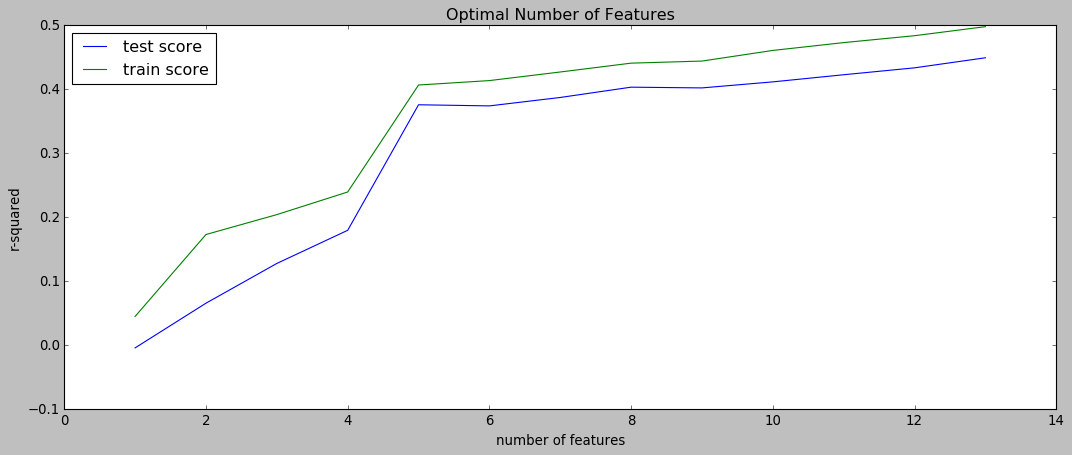

In [116]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

Now we can choose optimal value of number of features and build the model

In [117]:
# final model
n_features_optimal = 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.5317816836347862


Notice that the test score is very close to the 'mean test score' on the k-folds (about 60%). In general, the mean score estimated by CV will usually be a good estimate of the test score.

In [119]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
# linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.7042837359437832

In [122]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

0.5317816836347862

### Lasso

In [124]:
# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.704283679401237
0.5317608688473545


In [125]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 199391.555),
 ('MSZoning_FV', -7991.345),
 ('MSZoning_RH', -44227.816),
 ('MSZoning_RL', 12037.0),
 ('MSZoning_RM', 38558.115),
 ('Street_Pave', 30512.948),
 ('LotShape_IR2', 10070.445),
 ('LotShape_IR3', 32941.596),
 ('LotShape_Reg', -10296.753),
 ('LandContour_HLS', 34142.504),
 ('LandContour_Low', -24217.251),
 ('LandContour_Lvl', 7212.937),
 ('LotConfig_CulDSac', 18755.528),
 ('LotConfig_FR2', -18216.17),
 ('LotConfig_FR3', -57204.475),
 ('LotConfig_Inside', -10300.42),
 ('LandSlope_Mod', 16647.227),
 ('LandSlope_Sev', -14214.534),
 ('Neighborhood_Blueste', -46966.082),
 ('Neighborhood_BrDale', -103212.886),
 ('Neighborhood_BrkSide', -132855.901),
 ('Neighborhood_ClearCr', -117215.761),
 ('Neighborhood_CollgCr', -62005.672),
 ('Neighborhood_Crawfor', -72477.457),
 ('Neighborhood_Edwards', -117463.723),
 ('Neighborhood_Gilbert', -86693.216),
 ('Neighborhood_IDOTRR', -161394.356),
 ('Neighborhood_MeadowV', -98862.376),
 ('Neighborhood_Mitchel', -98232.497),
 ('Neighborh

In [126]:
# grid search CV

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

# grid search
# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [127]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.032560      0.005491         0.001118        0.000187       0.001   
1       0.029606      0.003677         0.000935        0.000044        0.01   
2       0.024722      0.006636         0.000915        0.000057           1   
3       0.020946      0.009009         0.000868        0.000091           5   
4       0.015614      0.009199         0.001064        0.000192          10   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}           0.586494           0.572096           0.597089   
1   {'alpha': 0.01}           0.586497           0.572919           0.597086   
2    {'alpha': 1.0}           0.586724           0.595598           0.597518   
3    {'alpha': 5.0}           0.587287           0.602393           0.599070   
4   {'alpha': 10.0}           0.588246           0.607154           0.601133   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.636840  ...         0.609168        0.030917                5   
1           0.639862  ...         0.609970        0.031327                4   
2           0.645684  ...         0.616582        0.029082                3   
3           0.651599  ...         0.620001        0.029698                2   
4           0.651589  ...         0.621972        0.029223                1   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.727975            0.705068            0.718694   
1            0.727975            0.705068            0.718694   
2            0.727958            0.705058            0.718681   
3            0.727596            0.704831            0.718377   
4            0.726817            0.704447            0.717768   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.697735            0.705829          0.711060         0.010819  
1            0.697734            0.705829          0.711060         0.010819  
2            0.697713            0.705815          0.711045         0.010820  
3            0.697467            0.705503          0.710755         0.010779  
4            0.697024            0.704721          0.710156         0.010678  

[5 rows x 21 columns]

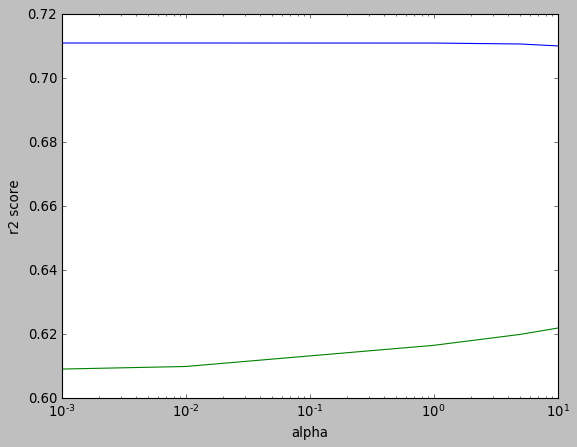

In [128]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [129]:
# model with optimal alpha
# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.704283679401237
0.5317608688473545


In [130]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 199391.555),
 ('MSZoning_FV', -7991.345),
 ('MSZoning_RH', -44227.816),
 ('MSZoning_RL', 12037.0),
 ('MSZoning_RM', 38558.115),
 ('Street_Pave', 30512.948),
 ('LotShape_IR2', 10070.445),
 ('LotShape_IR3', 32941.596),
 ('LotShape_Reg', -10296.753),
 ('LandContour_HLS', 34142.504),
 ('LandContour_Low', -24217.251),
 ('LandContour_Lvl', 7212.937),
 ('LotConfig_CulDSac', 18755.528),
 ('LotConfig_FR2', -18216.17),
 ('LotConfig_FR3', -57204.475),
 ('LotConfig_Inside', -10300.42),
 ('LandSlope_Mod', 16647.227),
 ('LandSlope_Sev', -14214.534),
 ('Neighborhood_Blueste', -46966.082),
 ('Neighborhood_BrDale', -103212.886),
 ('Neighborhood_BrkSide', -132855.901),
 ('Neighborhood_ClearCr', -117215.761),
 ('Neighborhood_CollgCr', -62005.672),
 ('Neighborhood_Crawfor', -72477.457),
 ('Neighborhood_Edwards', -117463.723),
 ('Neighborhood_Gilbert', -86693.216),
 ('Neighborhood_IDOTRR', -161394.356),
 ('Neighborhood_MeadowV', -98862.376),
 ('Neighborhood_Mitchel', -98232.497),
 ('Neighborh

In [131]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [132]:
lasso.coef_

array([     0.        , -18594.32883239,  25918.81025951,  31920.71256665,
         5446.93478244,   6381.76018526,    295.36290422, -10515.53714638,
        33527.56927891, -10883.84927874,   9035.59899344,  23255.08206486,
        -7613.19589244, -21637.2285836 ,  -7189.38370666,  12356.26336389,
           -0.        ,      0.        , -24507.70774439, -53282.18786388,
       -35123.99170872,      0.        ,  -4476.38129886, -52076.24468233,
       -17286.34307246, -77655.85805601, -22883.34365982, -32320.95624524,
       -46526.83899877,      0.        , -20325.88509122, 104223.08667397,
       126209.71946045, -66873.64587467, -35722.38830669, -53004.71501054,
         6498.27962406,  57350.50122344, 116197.2659199 ,  36859.86455712,
        17615.71503098,  -2184.74419255,  10422.07997374,      0.        ,
            0.        ,     -0.        ,   8858.99019296,     -0.        ,
            0.        ,     -0.        ,     -0.        , 121233.03629956,
            0.        ,  

In [148]:
from sklearn.metrics import mean_squared_error
from math import sqrt



ValueError: y_true and y_pred have different number of output (76!=1)

In [149]:
from sklearn.linear_model import Lasso

#found this best alpha through cross-validation
best_alpha = 0.00099


regr = Lasso(alpha=best_alpha, max_iter=50000)
regr.fit(X_train, y_train)
# run prediction on the training set to get a rough idea of how well it does
y_pred = regr.predict(X_train)

In [162]:
y_pred_lasso = regr.predict(X_test)
lasso_ex = np.exp(y_pred_lasso)


In [166]:
X_test.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
220             0            0            1            0            1   
1158            0            0            1            0            1   
59              0            0            1            0            1   
1198            0            0            1            0            1   
176             0            0            1            0            1   

      LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
220              0             0             0                0   
1158             0             0             1                0   
59               0             0             1                0   
1198             0             0             1                0   
176              0             0             0                0   

      LandContour_Low  ...  RoofStyle_Gambrel  RoofStyle_Hip  \
220                 0  ...                  0              0   
1158                0  ...                  0              0   
59                  0  ...                  0              0   
1198                0  ...                  0              0   
176                 0  ...                  0              0   

      RoofStyle_Mansard  RoofMatl_CompShg  RoofMatl_Membran  RoofMatl_Roll  \
220                   0                 1                 0              0   
1158                  0                 1                 0              0   
59                    0                 1                 0              0   
1198                  0                 1                 0              0   
176                   0                 1                 0              0   

      RoofMatl_Tar&Grv  RoofMatl_WdShake  RoofMatl_WdShngl  \
220                  0                 0                 0   
1158                 0                 0                 0   
59                   0                 0                 0   
1198                 0                 0                 0   
176                  0                 0                 0   

      Exterior1st_BrkComm  
220                     0  
1158                    0  
59                      0  
1198                    0  
176                     0  

[5 rows x 76 columns]

In [ ]:
pred1 = pd.DataFrame({'Id': X_test['Id'], 'SalePrice': lasso_ex})